In [795]:
import pandas as pd
df1 = pd.read_csv('BTC_Trial_NB1.csv')
df1.columns

Index(['Date', 'Month', 'Year', 'VOL1', 'VOL7', 'VOL30', 'ClosePrice ',
       'OpenPrice', 'HighPrice', 'LowPrice', 'Market Volumn', 'DirectionNo',
       'Direction', 'Average Block Size', 'Average Transaction Per Block',
       'Hash Rate', 'Network Difficulty', 'Unique Addresses',
       'Transactions Per Second', 'SP500', 'RUSSELL', 'Oil', 'Gold', 'Silver',
       'USDEUR', 'USDYUAN', 'Interest Rate', 'Economic Uncertainty',
       'Crypto Index'],
      dtype='object')

In [796]:
df1.index = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df1.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [797]:
df = df1.drop(['Date', 'Network Difficulty','DirectionNo'],axis=1)

In [798]:
df.shape

(2310, 26)

In [799]:
import pandas as pd

columns_to_lag_1_7 = ['VOL1', 'ClosePrice ','OpenPrice', 'HighPrice', 'LowPrice', 'Market Volumn']
columns_to_lag_1_2 = ['Average Block Size', 'Average Transaction Per Block', 'Hash Rate',
    'Transactions Per Second', 'SP500', 'RUSSELL',
    'Oil', 'Gold', 'Silver', 'USDEUR', 'USDYUAN', 'Interest Rate',
    'Economic Uncertainty', 'Crypto Index']

# Create lagged features for 1-7 lags for 'VOL1' and 'ClosePrice'
for column in columns_to_lag_1_7:
    for lag in range(1, 8):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)

# Create lagged features for 1-2 lags for the rest of the columns
for column in columns_to_lag_1_2:
    for lag in range(0, 5):
        df[f'{column}_lag{lag}'] = df[column].shift(lag)

# Include the original 'VOL1' and 'ClosePrice' columns
new_df = df[['VOL1', 'ClosePrice ','Direction','Month', 'Year'] + [f'{col}_lag{lag}' for col in columns_to_lag_1_7 for lag in range(1, 8)] + [f'{col}_lag{lag}' for col in columns_to_lag_1_2 for lag in range(0, 5)]]

# Drop rows with NaN values created due to lagging
new_df = new_df.dropna()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8676\34165455.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag{lag}'] = df[column].shift(lag)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8676\34165455.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column}_lag{lag}'] = df[column].shift(lag)
C:\Users\DELL\AppData\Local\Temp\ipykernel_8676\34165455.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [800]:
new_df.columns

Index(['VOL1', 'ClosePrice ', 'Direction', 'Month', 'Year', 'VOL1_lag1',
       'VOL1_lag2', 'VOL1_lag3', 'VOL1_lag4', 'VOL1_lag5',
       ...
       'Economic Uncertainty_lag0', 'Economic Uncertainty_lag1',
       'Economic Uncertainty_lag2', 'Economic Uncertainty_lag3',
       'Economic Uncertainty_lag4', 'Crypto Index_lag0', 'Crypto Index_lag1',
       'Crypto Index_lag2', 'Crypto Index_lag3', 'Crypto Index_lag4'],
      dtype='object', length=117)

In [801]:
x = new_df.drop(columns = ['ClosePrice ','VOL1','Direction'])
y = new_df['Direction']

In [802]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [803]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [804]:
X_train_scaled.shape, X_test_scaled.shape

((1842, 114), (461, 114))

In [805]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


In [806]:
from sklearn.model_selection import cross_val_score


In [807]:
rf = RandomForestClassifier(n_estimators=300, random_state = 24)
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

In [808]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [809]:
from sklearn.metrics import classification_report, accuracy_score

# Assuming y_test and y_pred are already defined

# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and accuracy
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
accuracy = accuracy_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.73
Precision: 0.69
Recall: 0.73


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [810]:
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#NMSE
def nmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    variance = np.var(y_true)
    return mse / variance

#DA
def DA(y_true, y_pred):
    # Convert the arrays to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the direction of change
    true_direction = np.sign(np.diff(y_true))
    pred_direction = np.sign(np.diff(y_pred))
    
    # Compare directions
    correct_direction = np.sum(true_direction == pred_direction)
    total_direction = len(true_direction)
    
    # Calculate directional accuracy
    da = correct_direction / total_direction * 100
    
    return da

In [811]:
# y_true = y_test
# y_predi = y_pred

# print("RMSE: ", rmse(y_true, y_predi))
# print("MAPE: ", mape(y_true, y_predi))
# print("NMSE: ", nmse(y_true, y_predi))
# print("DA: ", DA(y_true, y_predi))

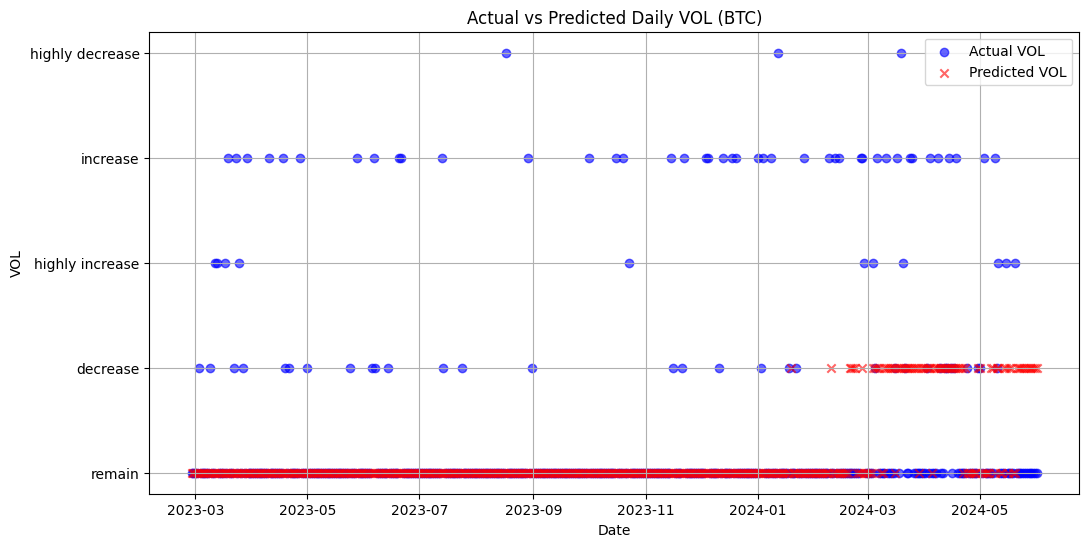

In [812]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are pandas Series with the same index
# and you have already set prediction_df.index = y_test.index

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot for actual values
plt.scatter(y_test.index, y_test, label='Actual VOL', color='b', alpha=0.6, marker='o')

# Scatter plot for predicted values
plt.scatter(y_test.index, y_pred, label='Predicted VOL', color='r', alpha=0.6, marker='x')

plt.title('Actual vs Predicted Daily VOL (BTC)')
plt.xlabel('Date')  # or another appropriate x-axis label
plt.ylabel('VOL')   # or another appropriate y-axis label
plt.legend()
plt.grid(True)
plt.show()


In [813]:
# from sklearn import metrics

# print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
# print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred))
# print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
# print('Max Error:', metrics.max_error(y_test, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
# print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
# print('R^2:', metrics.r2_score(y_test, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred))

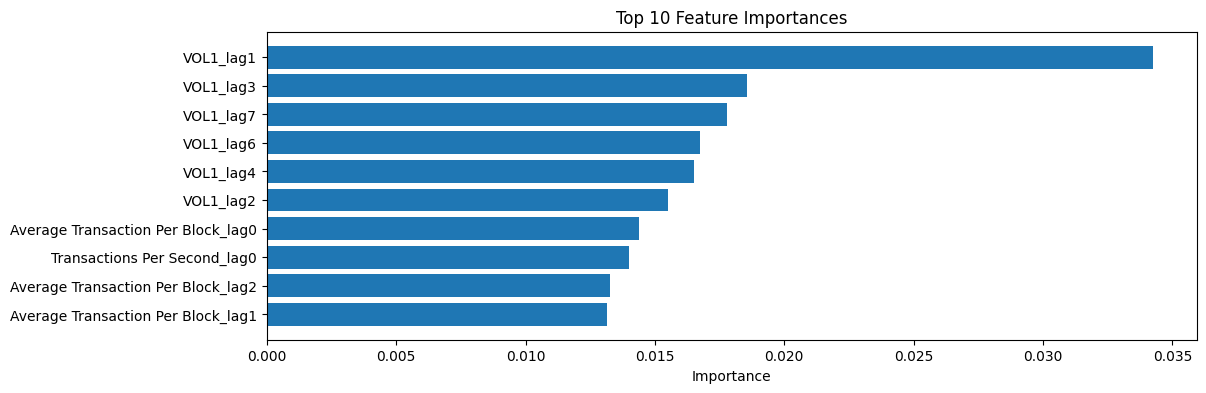

In [814]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_names = x.columns
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_features_df = feature_importances_df.head(10)

# Plot top 5 feature importances
plt.figure(figsize=(12, 4))
plt.barh(top_features_df['Feature'], top_features_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()